In [117]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 43.9 ms (started: 2024-01-22 16:58:46 +05:30)


In [118]:
import pandas as pd

time: 854 µs (started: 2024-01-22 16:58:46 +05:30)


# Data Preparation

In [119]:
data=pd.read_csv('/Users/sumitsoni/Desktop/data_science/project_identify_reaction/labels.csv')

time: 115 ms (started: 2024-01-22 16:58:47 +05:30)


In [120]:
data.head()

,Unnamed: 0,pth,label,relFCs
0,0,anger/image0000006.jpg,surprise,0.873142
1,1,anger/image0000060.jpg,anger,0.852311
2,2,anger/image0000061.jpg,anger,0.800957
3,3,anger/image0000066.jpg,disgust,0.843079
4,4,anger/image0000106.jpg,anger,0.849108


time: 21.6 ms (started: 2024-01-22 16:58:47 +05:30)


In [121]:
data['label'].value_counts()

surprise    4616
happy       4336
anger       3608
disgust     3472
contempt    3244
fear        3043
sad         2995
neutral     2861
Name: label, dtype: int64

time: 12.3 ms (started: 2024-01-22 16:58:48 +05:30)


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28175 entries, 0 to 28174
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28175 non-null  int64  
 1   pth         28175 non-null  object 
 2   label       28175 non-null  object 
 3   relFCs      28175 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 880.6+ KB
time: 43.2 ms (started: 2024-01-22 16:58:48 +05:30)


In [123]:
data.iloc[0,2]
len(data)

28175

time: 2.1 ms (started: 2024-01-22 16:58:49 +05:30)


In [124]:
# Check the pixel size (height, width, channels)
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

i=0
pth=data.iloc[i,1]
image_path = '/Users/sumitsoni/Desktop/data_science/project_identify_reaction/'+pth
img = mpimg.imread(image_path)
# Check the shape of the image
height, width, channels = img.shape
print(f"Height - {height}", f", width - {height}",f", Color - {channels}")

#Color -3 means RGB, Color - 1 means Gray



Height - 96 , width - 96 , Color - 3
time: 21.4 ms (started: 2024-01-22 16:58:50 +05:30)


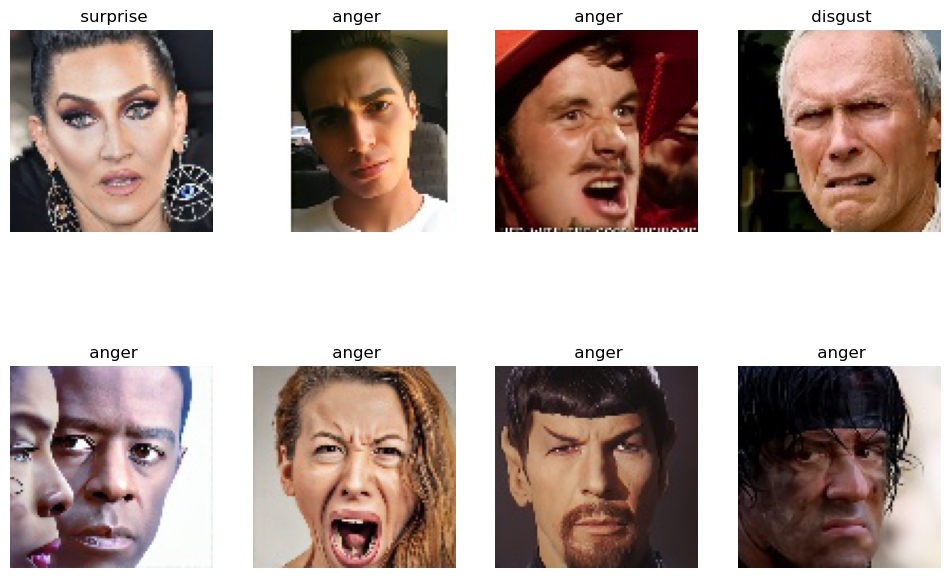

time: 360 ms (started: 2024-01-22 16:58:52 +05:30)


In [125]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specifying the path to your image file

def image_show(i):
    pth=data.iloc[i,1]
    image_path = '/Users/sumitsoni/Desktop/data_science/project_identify_reaction/'+pth
    img = mpimg.imread(image_path)
    return img,data.iloc[i,2]

# Displaying the random 8 images from the file
i=8
num_cols=int(i/2)
num_rows=int(i/num_cols)+i%2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i in range(0,i):
    row = i // num_cols
    col = i % num_cols
    img_path,title=image_show(i)
    axes[row, col].imshow(img_path)
    axes[row, col].set_title(f' {title}')
    axes[row, col].axis('off')

Text(0.5, 1.0, 'Grey Image')

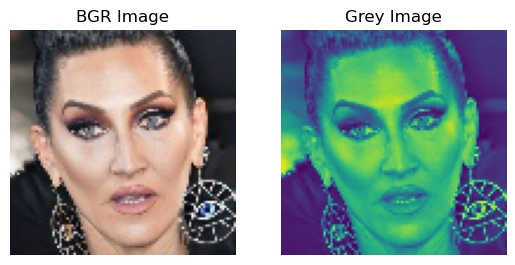

time: 383 ms (started: 2024-01-22 03:11:52 +05:30)


In [9]:

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Normalize pixel values to the range [0, 1]
img_normalized = img_gray / 255.0

# Now, img_normalized contains pixel values in the range [0, 1] as grayscale

# Display the BGR image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('BGR Image')

plt.subplot(1, 2, 2)
plt.imshow(img_normalized)
plt.axis('off')
plt.title('Grey Image')

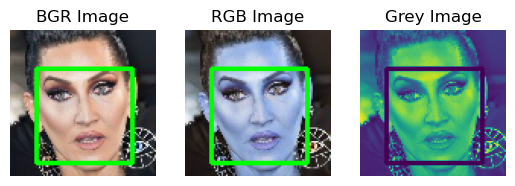

time: 3.51 s (started: 2024-01-22 03:11:59 +05:30)


In [11]:
from IPython.display import Image, display
import cv2
import numpy as np
import face_recognition
import matplotlib.pyplot as plt

# image_path = "path/to/your/image.jpg"  # Replace this with the actual path to your image
i=0
pth=data.iloc[i,1]
image_path = '/Users/sumitsoni/Desktop/data_science/project_identify_reaction/'+pth


# Load the image in BGR format
img_bgr = face_recognition.load_image_file(image_path)



# Convert the image to RGB color space
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Find face locations in the image
face_locations = face_recognition.face_locations(img_bgr)

# Draw rectangles around the detected faces
for face_location in face_locations:
    top, right, bottom, left = face_location
    cv2.rectangle(img_bgr, (left, top), (right, bottom), (0, 255, 0), 2)
    cv2.rectangle(img_rgb, (left, top), (right, bottom), (0, 255, 0), 2)
    cv2.rectangle(img_gray, (left, top), (right, bottom), (0, 255, 0), 2)


# Display the BGR image
plt.subplot(1, 3, 1)
plt.imshow(img_bgr)
plt.title('BGR Image')
plt.axis('off')

# Display the RGB image
plt.subplot(1, 3, 2)
plt.imshow(img_rgb)
plt.title('RGB Image')
plt.axis('off')

# Display the RGB image
plt.subplot(1, 3, 3)
plt.imshow(img_gray)
plt.title('Grey Image')
plt.axis('off')

plt.show()




In [12]:
# data.head(2)

time: 251 µs (started: 2024-01-22 03:12:03 +05:30)


# Data Preprocessing

In [13]:
# Extract features (image paths) and labels
X = data['pth'].values
y = data['label'].values

time: 844 µs (started: 2024-01-22 03:12:03 +05:30)


In [14]:
import cv2
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img_gray, (96, 96))
    img_normalized = img_resized / 255.0
    return img_normalized


X_preprocessed=np.array([preprocess_image(image_path) for image_path in X])

# Labeling the data
le = LabelEncoder()
y_preprocessed = to_categorical(le.fit_transform(y))


time: 49.7 s (started: 2024-01-22 03:12:04 +05:30)


# Data Splitting

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_preprocessed, test_size=0.2, random_state=42, stratify=y)


time: 10.4 s (started: 2024-01-22 03:12:54 +05:30)


In [47]:
input_shape=X_preprocessed[0].shape

time: 484 µs (started: 2024-01-22 03:21:03 +05:30)


In [48]:
input_shape

(96, 96)

time: 1.86 ms (started: 2024-01-22 03:21:04 +05:30)


# Model Design & Compilation

In [74]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras import models, layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import platform
from keras.optimizers import Adam

# create model structure
model = Sequential()

input_shape=(96, 96, 1)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape= input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
#Number of class
num_class= len(np.unique(y))
model.add(Dense(num_class, activation='softmax'))

# Compile the model

if 'M1' in platform.processor() or 'M2' in platform.processor():
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
else:
    optimizer = Adam(learning_rate=0.001)
    
    
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Plot the model
plot_model(model, to_file='/Users/sumitsoni/Desktop/data_science/project_identify_reaction/model_plot.png', show_shapes=True, show_layer_names=True)
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 94, 94, 32)        320       
                                                                 
 conv2d_49 (Conv2D)          (None, 92, 92, 64)        18496     
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 46, 46, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_44 (Dropout)        (None, 46, 46, 64)        0         
                                                                 
 conv2d_50 (Conv2D)          (None, 44, 44, 128)       73856     
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 22, 22, 128)       0         
 ng2D)                                               

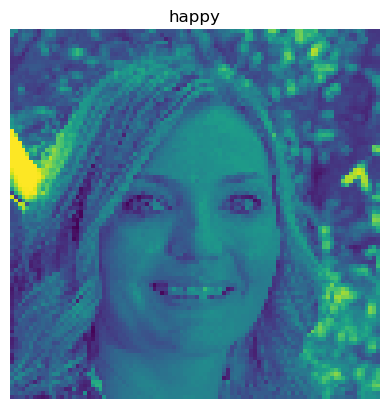

time: 76 ms (started: 2024-01-22 03:24:21 +05:30)


In [62]:
# choose a random image index
idx = np.random.randint(len(X))

# display ramdom image 
plt.imshow(X_preprocessed[idx])
plt.title(y[idx])
plt.axis('off')  
plt.show()

# Model Training

In [75]:
num_epochs=20
batch_size=64
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)
# model.save('model_2.h5')


Epoch 1/20
282/282 [==============================] - 298s 1s/step - loss: 1.8834 - accuracy: 0.2742 - val_loss: 1.6447 - val_accuracy: 0.4031
Epoch 2/20
282/282 [==============================] - 431s 2s/step - loss: 1.5496 - accuracy: 0.4204 - val_loss: 1.3973 - val_accuracy: 0.4785
Epoch 3/20
282/282 [==============================] - 462s 2s/step - loss: 1.3862 - accuracy: 0.4813 - val_loss: 1.2889 - val_accuracy: 0.5109
Epoch 4/20
282/282 [==============================] - 411s 1s/step - loss: 1.2789 - accuracy: 0.5247 - val_loss: 1.2043 - val_accuracy: 0.5552
Epoch 5/20
282/282 [==============================] - 412s 1s/step - loss: 1.1771 - accuracy: 0.5607 - val_loss: 1.1746 - val_accuracy: 0.5572
Epoch 6/20
282/282 [==============================] - 363s 1s/step - loss: 1.0971 - accuracy: 0.5906 - val_loss: 1.1226 - val_accuracy: 0.5810
Epoch 7/20
282/282 [==============================] - 9024s 32s/step - loss: 1.0384 - accuracy: 0.6190 - val_loss: 1.1057 - val_accuracy: 0.59

# Model Evaluation:

<Axes: >

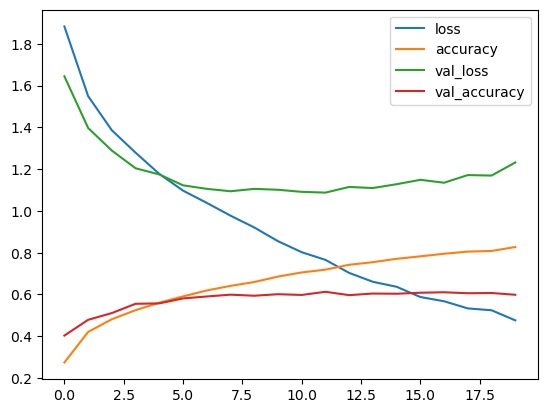

time: 329 ms (started: 2024-01-22 14:03:53 +05:30)


In [81]:
pd.DataFrame(history.history).plot()

      Label  Precision    Recall  F1-score       AUC
0     anger   0.540508  0.619114  0.577147  0.900963
1  contempt   0.583454  0.619414  0.600897  0.922262
2   disgust   0.510015  0.476945  0.492926  0.860642
3      fear   0.697727  0.504105  0.585319  0.917159
4     happy   0.801733  0.853518  0.826816  0.975540
5   neutral   0.442336  0.529720  0.482100  0.878447
6       sad   0.554987  0.362270  0.438384  0.880857
7  surprise   0.603298  0.673889  0.636643  0.908304
8   Overall   0.591757  0.579872  0.580029  0.905097


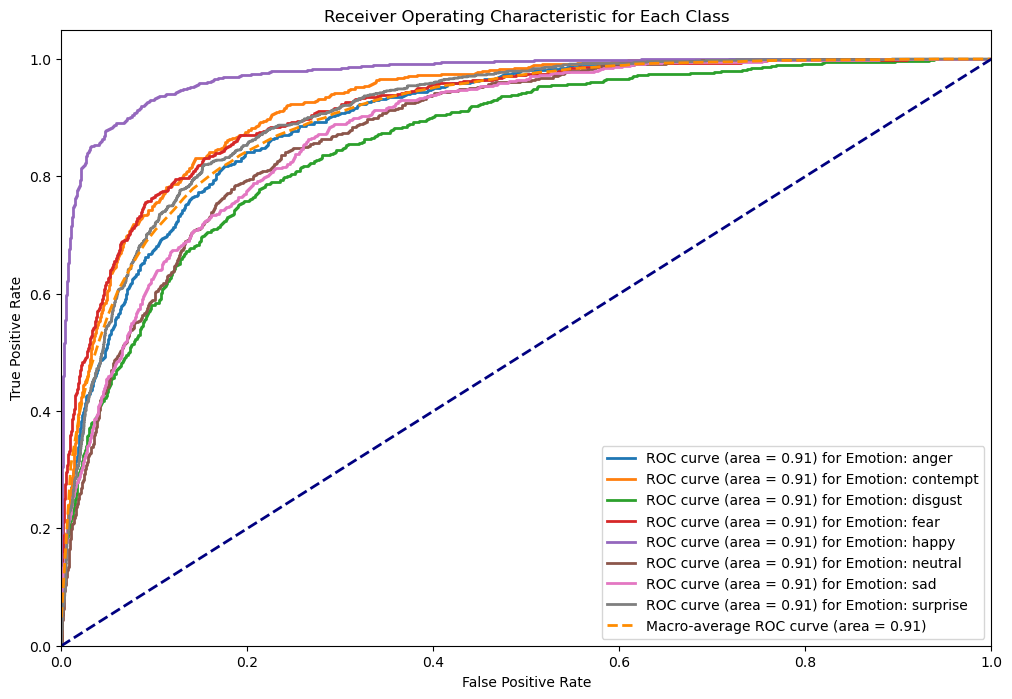

time: 173 ms (started: 2024-01-22 14:51:04 +05:30)


In [114]:
# Convert probabilities to binary predictions
y_pred_labels = np.argmax(y_pred_prob, axis=1)

# Convert y_test to binary labels
y_true_labels = np.argmax(y_test, axis=1)

# List to store individual precision, recall, and F1-score values for each class
class_metrics = []

# List to store individual AUC values and ROC curves for each class
roc_curves = []


for i in range(8):
    # Convert predicted and true labels to binary labels
    y_pred_binary = (y_pred_labels == i)
    y_true_binary = (y_true_labels == i)
    
    # Calculate precision, recall, and F1-score
    precision = precision_score(y_true_binary, y_pred_binary)
    recall = recall_score(y_true_binary, y_pred_binary)
    f1 = f1_score(y_true_binary, y_pred_binary)
    
    # ROC curve calculation
    fpr, tpr, _ = roc_curve(y_true_binary, y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    roc_curves.append((fpr, tpr, label_mapping[i]))
    
    # Store metrics in a dictionary
    class_metrics.append({
        'Label': label_mapping[i],
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': roc_auc
    })


    
# Compute and plot macro-average ROC curve
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.mean([np.interp(mean_fpr, fpr, tpr) for fpr, tpr, _ in roc_curves], axis=0)
macro_auc = auc(mean_fpr, mean_tpr)




# Calculate overall precision, recall, and F1-score
overall_precision = precision_score(y_true_labels, y_pred_labels, average='macro')
overall_recall = recall_score(y_true_labels, y_pred_labels, average='macro')
overall_f1 = f1_score(y_true_labels, y_pred_labels, average='macro')

class_metrics.append({
    'Label': 'Overall',
    'Precision': overall_precision,
    'Recall': overall_recall,
    'F1-score': overall_f1,
    'AUC': macro_auc
})


# Create a Pandas DataFrame from the list of metrics
metrics_df = pd.DataFrame(class_metrics)

# Optionally, print the metrics table
print(metrics_df)


# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
lw = 2

    
for fpr, tpr, label in roc_curves:
    plt.plot(fpr, tpr, lw=lw, label='ROC curve (area = {:.2f}) for Emotion: {}'.format(roc_auc, label))

plt.plot(mean_fpr, mean_tpr, color='darkorange', linestyle='--', linewidth=2, label='Macro-average ROC curve (area = {:.2f})'.format(macro_auc))


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Each Class')
plt.legend(loc='lower right')
plt.show()

In [79]:
# save model structure in json file
model_json = model.to_json()
with open("model_file/model_json.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
model.save_weights('model_file/model_weight.h5')

time: 108 ms (started: 2024-01-22 14:01:25 +05:30)
